In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('PRGn_r')
sns.set_context('notebook')

In [2]:
df = pd.read_csv('data/BostonHousing.csv')

In [3]:
df.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [4]:
row = df.shape[0]
column = df.shape[1]
print(f"Total number of instances: {row} \nTotal number of features: {column}") 

Total number of instances: 506 
Total number of features: 14


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Text(0.5, 1.0, 'Distribution of Nox')

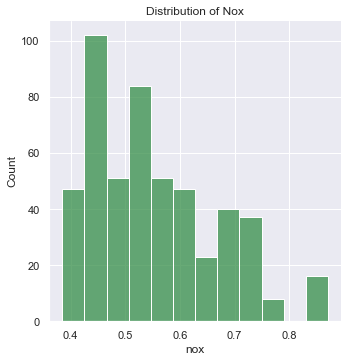

In [7]:
# Plotting target distribution
sns.displot(df['nox'])
plt.title("Distribution of Nox")

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Medv')

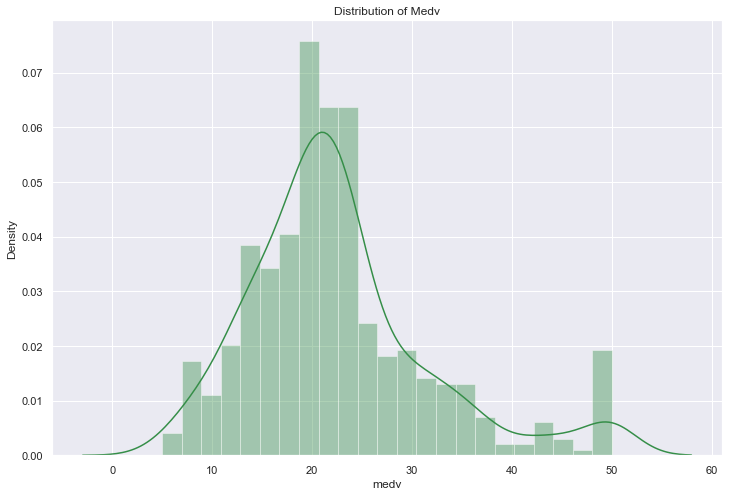

In [8]:
sns.distplot(df['medv'])
plt.title("Distribution of Medv")

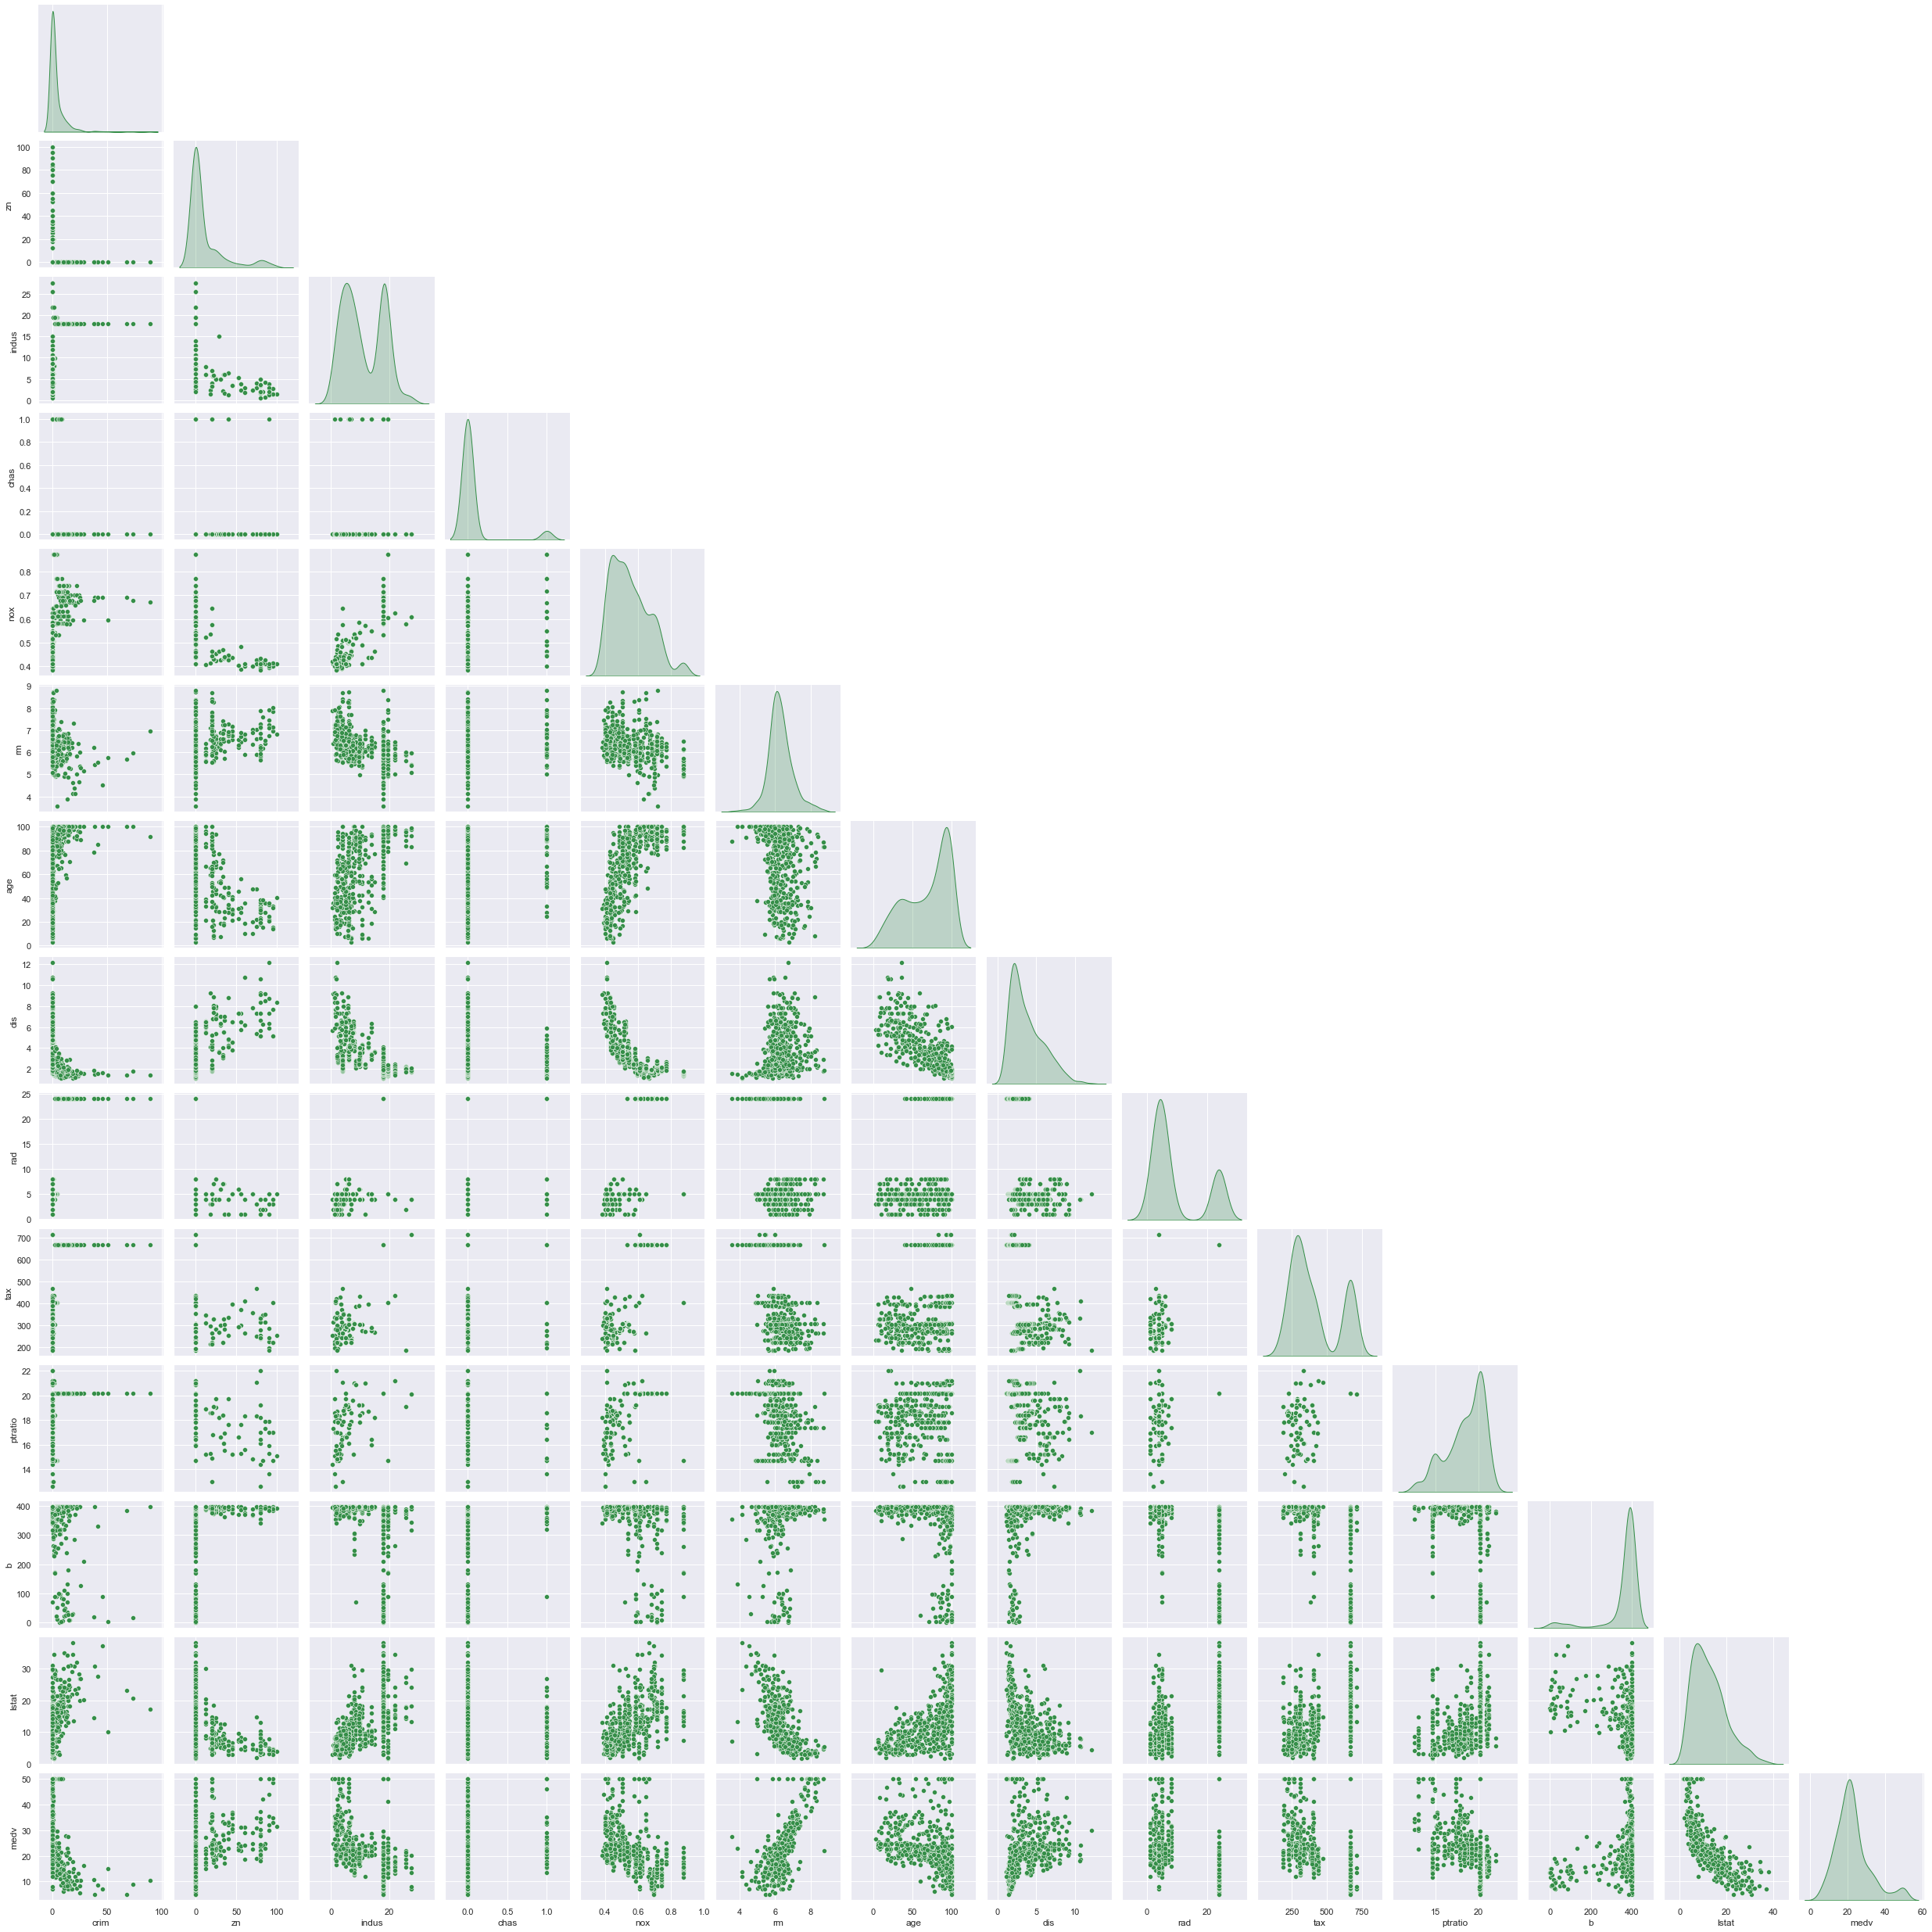

In [9]:
sns.pairplot(df, diag_kind='kde', corner=True)
plt.show()

In [10]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

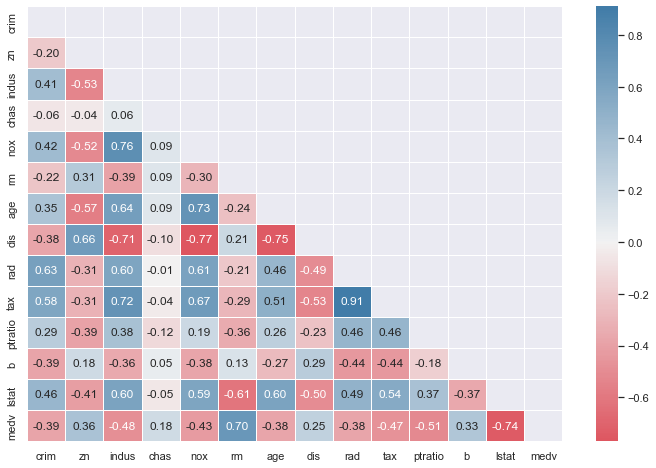

In [11]:
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap=cmap, linewidths=1, annot=True, fmt=".2f")

In [12]:
## Scaling
from sklearn.preprocessing import StandardScaler

df_processed = df.loc[:, ["nox","medv"]]

for num in df.drop(['nox', 'medv'], axis=1).columns:
    scaler = StandardScaler()
    scaler.fit(df[[num]])
    temp = scaler.transform(df[[num]])
    df_processed[num+'_scaled'] = temp

In [13]:
df_processed

,nox,medv,crim_scaled,zn_scaled,indus_scaled,chas_scaled,rm_scaled,age_scaled,dis_scaled,rad_scaled,tax_scaled,ptratio_scaled,b_scaled,lstat_scaled
0,0.538,24.0,-0.419782,0.284830,-1.287909,-0.272599,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,0.469,21.6,-0.417339,-0.487722,-0.593381,-0.272599,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,0.469,34.7,-0.417342,-0.487722,-0.593381,-0.272599,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,0.458,33.4,-0.416750,-0.487722,-1.306878,-0.272599,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,0.458,36.2,-0.412482,-0.487722,-1.306878,-0.272599,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.573,22.4,-0.413229,-0.487722,0.115738,-0.272599,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
502,0.573,20.6,-0.415249,-0.487722,0.115738,-0.272599,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
503,0.573,23.9,-0.413447,-0.487722,0.115738,-0.272599,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
504,0.573,22.0,-0.407764,-0.487722,0.115738,-0.272599,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [14]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression

X = df_processed.drop(["nox","medv"], axis=1)
y_nox = df_processed["nox"]

X_train,X_test,y_nox_train,y_nox_test= train_test_split(X,y_nox,test_size=0.2,random_state=101)

## NOX

In [15]:
## Baseline
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_nox_null = np.zeros_like(y_nox_test, dtype=float)
y_nox_null.fill(y_nox_train.mean())
baseline_nox = np.sqrt(mean_squared_error(y_nox_test, y_nox_null))
print("Baseline model (\"NOX\")RMSE: ", baseline_nox)

Baseline model ("NOX")RMSE:  0.12493638970628508


In [16]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(lm, X_train, y_nox_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print('MSE cross validation: ', mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

lm.fit(X_train,y_nox_train)
prediction = lm.predict(X_test)

print('MAE: {}'.format(mean_absolute_error(y_nox_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_nox_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_nox_test, prediction))))

MSE cross validation:  0.0033817365317822708
RMSE cross validation:  0.058152700124605314
MAE: 0.041021924132597795
MSE: 0.0033122354732671106
RMSE: 0.057552024058821


In [17]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [18]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid_search, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_nox_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 7,
 'bootstrap': False}

In [20]:
rf_best = RandomForestRegressor(**rf_random.best_params_)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(rf_best, X_train, y_nox_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print (mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

0.0014421005008393869
RMSE cross validation:  0.03797499836523218


In [22]:
rf_best.fit(X_train,y_nox_train)
prediction = rf_best.predict(X_test)
print('MAE: {}'.format(mean_absolute_error(y_nox_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_nox_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_nox_test, prediction))))

MAE: 0.021080076892756205
MSE: 0.00102988847786062
RMSE: 0.03209187557405488


In [23]:
freq_imp = pd.DataFrame(rf_best.feature_importances_, columns=['importances'])
freq_imp[['importances']].sort_values(by='importances',ascending=False)

,importances
6,0.252151
0,0.223712
2,0.195981
5,0.093898
8,0.073525
7,0.054938
9,0.033591
1,0.027710
4,0.019487
11,0.018214


In [24]:
from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(rf_best, threshold='mean')
selector.fit(X_train, y_nox_train)
## print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())
X_train_imp = selector.transform(X_train)
X_test_imp = selector.transform(X_test)

0.08333333333333333
[ True False  True False False False  True False  True False False False]


In [25]:
rf_best_imp = RandomForestRegressor(**rf_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(rf_best_imp, X_train_imp, y_nox_train, cv=cv, scoring='neg_mean_squared_error')
scores_mean = (scores).mean()
print('Accuracy cross validation: ',scores_mean)

Accuracy cross validation:  -0.0016208519454492631


In [27]:
rf_best_imp.fit(X_train_imp,y_nox_train)
prediction = rf_best_imp.predict(X_test_imp)
print('MAE: {}'.format(mean_absolute_error(y_nox_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_nox_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_nox_test, prediction))))

MAE: 0.02110036769463634
MSE: 0.001122964519437219
RMSE: 0.03351066277227622


In [28]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ["friedman_mse", "mse", "mae"]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gbt = GradientBoostingRegressor()
gbt_random = RandomizedSearchCV(estimator = gbt, param_distributions = grid_search, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

gbt_random.fit(X_train_imp,y_nox_train)
gbt_random.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20,
 'criterion': 'mae'}

In [31]:
gbt_best = GradientBoostingRegressor(**gbt_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(gbt_best, X_train_imp, y_nox_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print (mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in

0.0020118770145985316
RMSE cross validation:  0.044853952051057126


## MEDV

In [32]:
y_medv = df_processed["medv"]
X_train,X_test,y_medv_train,y_medv_test= train_test_split(X,y_medv,test_size=0.2,random_state=101)

In [33]:
## Baseline model
y_medv_null = np.zeros_like(y_medv_test, dtype=float)
y_medv_null.fill(y_medv_train.mean())
baseline_medv = np.sqrt(mean_squared_error(y_medv_test, y_medv_null))
print("Baseline model (\"MEDV\")RMSE: ", baseline_medv)

Baseline model ("MEDV")RMSE:  10.636534612830001


In [34]:
lm = LinearRegression()

cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(lm, X_train, y_medv_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print('MSE cross validation: ', mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

lm.fit(X_train,y_medv_train)
prediction = lm.predict(X_test)

print('MAE: {}'.format(mean_absolute_error(y_medv_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_medv_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_medv_test, prediction))))

MSE cross validation:  23.128163123518938
RMSE cross validation:  4.809174890094863
MAE: 4.0814560120322145
MSE: 35.07500260947511
RMSE: 5.922415268239396


In [35]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 10, num = 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid_search, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train,y_medv_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 90,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [37]:
rf_best = RandomForestRegressor(**rf_random.best_params_)

cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(rf_best, X_train, y_medv_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print (mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

13.474105490285325
RMSE cross validation:  3.670709126352199


In [38]:
rf_best.fit(X_train,y_medv_train)
prediction = rf_best.predict(X_test)
print('MAE: {}'.format(mean_absolute_error(y_medv_test, prediction)))
print('MSE: {}'.format(mean_squared_error(y_medv_test, prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_medv_test, prediction))))

MAE: 2.811053363062004
MSE: 16.064826375777
RMSE: 4.008095105630229


In [39]:
freq_imp = pd.DataFrame(rf_best.feature_importances_, columns=['importances'])
freq_imp[['importances']].sort_values(by='importances',ascending=False)

,importances
4,0.426475
11,0.406176
6,0.065527
0,0.034372
8,0.014808
5,0.014006
9,0.013646
10,0.011177
2,0.007199
7,0.004248


In [40]:
selector = SelectFromModel(rf_best, threshold='mean')
selector.fit(X_train, y_medv_train)
## print(selector.estimator_.coef_)
print(selector.threshold_)
print(selector.get_support())
X_train_imp = selector.transform(X_train)
X_test_imp = selector.transform(X_test)

0.08333333333333333
[False False False False  True False False False False False False  True]


In [41]:
rf_best_imp = RandomForestRegressor(**rf_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
scores = cross_val_score(rf_best_imp, X_train_imp, y_medv_train, cv=cv, scoring='neg_mean_squared_error')
scores_mean = (scores).mean()
print('Accuracy cross validation: ',scores_mean)

Accuracy cross validation:  -20.04027288458084


In [42]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
criterion = ["friedman_mse", "mse", "mae"]
grid_search = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [43]:
gbt = GradientBoostingRegressor()
gbt_random = RandomizedSearchCV(estimator = gbt, param_distributions = grid_search, n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

gbt_random.fit(X_train_imp,y_medv_train)
gbt_random.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in

{'n_estimators': 32,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 2,
 'criterion': 'mae'}

In [44]:
gbt_best = GradientBoostingRegressor(**gbt_random.best_params_)
cv = KFold(n_splits=5, random_state=1, shuffle=True)
mse_scores = cross_val_score(gbt_best, X_train_imp, y_medv_train, cv=cv, scoring='neg_mean_squared_error')
mse_mean = (-mse_scores).mean()
print (mse_mean)
print('RMSE cross validation: ',np.sqrt(mse_mean))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in

18.00686712784769
RMSE cross validation:  4.24344990872376


/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_gb.py:1630: FutureWarning: criterion='mae' was deprecated in version 0.24 and will be removed in version 1.1 (renaming of 0.26). The correct way of minimizing the absolute error is to use  loss='lad' instead.
  warnings.warn("criterion='mae' was deprecated in version 0.24 and "


[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.3s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.4s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=30; total time=   0.1s
[CV] END bootstrap=False, max_depth=7, max_feature

[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, max_depth=9, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=80; total time=   0.4s
[CV] END bootstrap=True, max_depth=8, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10; total time=   0.1s
[CV] END bootstrap=True, max_depth=7, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=60; total time=   0.3s
[CV] END bootstrap=True, max_depth=7, max_features=aut